#**PA2: Multilayer Perceptron**

### **Introduction**
In this programming assignment, you will implement the Multilayer Perceptron (MLP) in Python using only the numpy library. This implementation will allow the creation of neural networks with any number of layers. As in the previous project, this model will also be used to solve the problem of classifying cat images. At the end of this activity, you will have a deep neural network with considerably better performance than the logistic regression implemented in the previous project.

### **Objective**

The main objective of this project is to learn the implementation of the MLP algorithm with a flexible number of layers. Mainly the forward pass and backpropagation of errors. Additionally, you will implement the ReLU activation function and gain experience in comparing neural models of different sizes.

### **Instructions**

The cells where you need to write code are highlighted with the following comments:

```python
### YOUR CODE STARTS HERE ### ≈x lines
### YOUR CODE ENDS HERE ###
```

Write your solutions only between these two comments. Note that the starting comment gives you an idea of the number of lines of code expected in the solution.

After each cell of this type, there will be a test cell followed by expected results, so you can know if your solution is correct.

### **Part 0: Import libraries**

As we did in the previous assignment, our first task is to load the numpy library and other auxiliary libraries, which will help us visualize the data and results:

- **numpy**: main scientific computing library in Python.
- **matplotlib**: main library for plotting graphs in Python.
- **h5py**: read datasets in h5 format.
- **PIL**: test your model with your own images.

Note:
As seen in class, we need to initialize the MLP weights with random values close to zero. Therefore, in this project, we initialize the numpy random number generator (np.random.seed(1)) with a fixed seed, so that your results will be the same as the expected results.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image

%matplotlib inline

np.random.seed(1)

### **Part 1: Load and preprocess the dataset**

#### **1.1 Download the dataset**

The dataset for this project contains:
  - Training: $n_{tr}$ images labeled as Cat ($y=1$) or Not-cat ($y=0$)
  - Test: $n_{te}$ images labeled as Cat ($y=1$) or Not-cat ($y=0$)
  
All images are square and colored. Therefore, they are represented by numpy arrays in the form `(num_px, num_px, 3)`, where `num_px` is the width and height of the image, and 3 refers to the color channels (RGB).

In [5]:
!wget -O 'train_catvnoncat.h5' 'https://raw.githubusercontent.com/JhonataMiranda/CCF482/main/train_catvnoncat.h5'
!wget -O 'test_catvnoncat.h5' 'https://raw.githubusercontent.com/JhonataMiranda/CCF482/main/test_catvnoncat.h5'

train_dataset = h5py.File('train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # training set images
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # training set image labels

test_dataset = h5py.File('test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # testing set images
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # testing set image labels

classes = np.array(test_dataset["list_classes"][:]) # list of classes

train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

--2025-09-30 13:47:26--  https://raw.githubusercontent.com/JhonataMiranda/CCF482/main/train_catvnoncat.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2572022 (2.5M) [application/octet-stream]
Saving to: ‘train_catvnoncat.h5’

train_catvnoncat.h5 100%[===================>]   2.45M  --.-KB/s    in 0.06s   

2025-09-30 13:47:26 (37.8 MB/s) - ‘train_catvnoncat.h5’ saved [2572022/2572022]

--2025-09-30 13:47:26--  https://raw.githubusercontent.com/JhonataMiranda/CCF482/main/test_catvnoncat.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK

#### **1.2 Visualization of dataset examples**

Each row of `train_set_x_orig` and `test_set_x_orig` is a numpy array representing an image. You can visualize an example by executing the following code. Feel free to change the value of the `index` variable and run again to see other images.

y = 1, it's a 'cat' picture.


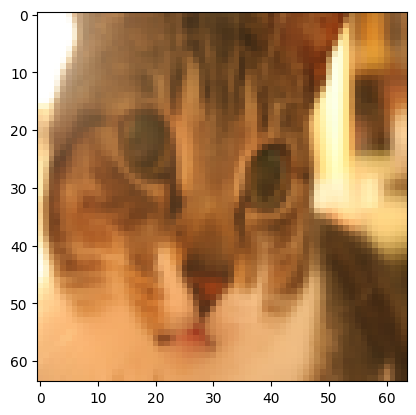

In [6]:
# Plotting an image from the training set
index = 200
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[0, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

#### **1.3 Data pre-processing**

Just like in the previous project, we also need to process the data in this project. Since the dataset is exactly the same, the following cell performs the data pre-processing exactly as in the previous project.

In [7]:
# Get number of train examples, test examples and image size
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

print ("train_set_x shape: " + str(train_set_x.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("train_y shape: " + str(train_set_y.shape))
print ("test_y shape: " + str(test_set_y.shape))
print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

train_set_x shape: (12288, 209)
test_set_x shape: (12288, 50)
train_y shape: (1, 209)
test_y shape: (1, 50)
Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)


### **Part 2: Define the model**

In this project, we will use the MLP for the classification of cat images. Remember that the MLP organizes neurons in a layered structure. The general formulation of the MLP allows both the number of layers L and the number of neurons $m^{[l]}$ per layer $1 \leq l \leq L$ to be configurable according to the complexity of the learning problem. Additionally, the activation functions of the MLP neurons don't necessarily need to be the sigmoid function. We can choose the activation function for each layer of the network. Remember that this general formulation of the MLP has the following hypothesis:

$$
\begin{align}
Z^{[l]} &= W^{[l]} A^{[l-1]} + \mathbf{b}^{[l]} \\
\mathbf{A}^{[l]} &= g^{[l]}(Z^{[l]}) \\
\end{align} $$, where:

- $W^{[l]}$ is the weight matrix of layer $l$ with dimensions $({m^{[l]}, m^{[l-1]}}$);
- $\mathbf{b}^{[l]}$ is the bias vector of layer $l$ with dimensions $(m^{[l]}, 1)$;
- $A^{[L]}$ is the activation matrix of layer $l$ with dimensions $(m^{[l]}, n)$;
- $g^{[l]}$ is the activation function of layer $l$.

According to this definition, we will have the following dimensions for a network with L layers (Remember that $A^{[0]} = X$ and $A^{[L]} = \hat{Y}$):

<table style="width:100%">
    <tr>
        <td>  </td>
        <td> **  Dimensions of $W^{[l]}$  ** </td>
        <td> **  Dimensions of $b^{[l]}$  **  </td>
        <td> **  Dimensions of $A^{[l]}$  ** </td>
    <tr>
    <tr>
        <td> ** Layer [1] ** </td>
        <td> $(m^{[1]}, 12288)$ </td>
        <td> $(m^{[1]}, 1)$ </td>
        <td> $(m^{[1]}, 209)$ </td>
    <tr>
    <tr>
        <td> ** Layer [2] ** </td>
        <td> $(m^{[2]}, m^{[1]})$  </td>
        <td> $(m^{[2]}, 1)$ </td>
        <td> $(m^{[2]}, 209)$ </td>
    <tr>
       <tr>
        <td> $\vdots$ </td>
        <td> $\vdots$  </td>
        <td> $\vdots$  </td>
        <td> $\vdots$  </td>
    <tr>
   <tr>
        <td> ** Layer [L-1] ** </td>
        <td> $(m^{[L-1]}, m^{[L-2]})$ </td>
        <td> $(m^{[L-1]}, 1)$  </td>
        <td> $(m^{[L-1]}, 209)$ </td>
    <tr>
   <tr>
        <td> ** Layer [L] ** </td>
        <td> $(m^{[L]}, m^{[L-1]})$ </td>
        <td> $(m^{[L]}, 1)$ </td>
        <td> $(m^{[L]}, 209)$  </td>
    <tr>
</table>


#### **2.1 Activation Functions**

#### **2.1.1 Sigmoid**

The learning problem in this project is the same as in the previous project: binary classification. Therefore, we will use the sigmoid activation function in the output layer and the Binary Cross-Entropy loss function. Since the Sigmoid function was already implemented in the previous project, the following cell already contains the implementation of this function. However, in addition to the activation, the function also returns the value of Z, which we call "cache," as we will use this value during the gradient calculation during backpropagation.

In [8]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """

    A = 1/(1+np.exp(-Z))
    cache = Z

    return A, cache

#### **2.1.2 Relu**

As seen in class, ReLU is currently one of the most popular choices for the activation function of neurons in hidden layers. In this project, we will also use this function in these layers.

Implement the ReLU activation function. Note that, just like with the sigmoid, the function returns both the activation and the value of Z. Remember that ReLU is defined by $relu(z) = max(0, z)$. In numpy, the max function is implemented by `np.maximum`.

In [9]:
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    A = np.maximum(0,Z)

    assert(A.shape == Z.shape)

    cache = Z
    return A, cache

In [10]:
Z = np.array([[-2.0 , 7.0]])
A, cache = relu(Z)

print("Activation: ", A)
print("Cache: ", cache)

Activation:  [[0. 7.]]
Cache:  [[-2.  7.]]


**Expected result:**
<table style="width:50%">
  <tr>
    <td> **Activation** </td>
    <td > [[ 0.  7.]]</td>
  </tr>
  <tr>
    <td> **Cache ** </td>
    <td > [[ -2.  7.]] </td>
  </tr>
</table>

### **2.2 - Multilayer Perceptron**
Implement the forward propagation of an MLP with L layers. To do this, implement two auxiliary functions: `linear_forward` and `linear_activation_forward`. The first calculates the linear part $Z^{[l]}$ and the second calculates the activation $g^{[l]}(Z^{[l]})$ of layer $l$. This will facilitate the implementation of backpropagation in the next steps.

#### **2.1 Linear Combination of Layer $l$**

Implement the linear combination $Z^{[l]}$ between the weights and inputs of a layer $l$ of the MLP. Remember that this combination is given by the equation $Z^{[l]} = W^{[l]} A^{[l-1]} + \mathbf{b}^{[l]}$.

In [11]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """


    Z = np.dot(W, A) + b


    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache

In [12]:
np.random.seed(1)

A = np.random.randn(3,2); W = np.random.randn(1,3); b = np.random.randn(1,1)
Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


**Expected result:**

<table style="width:35%">
  
  <tr>
    <td> **Z** </td>
    <td> [[ 3.26295337 -1.23429987]] </td>
  </tr>
  
</table>

#### **2.2 Activation of Layer $l$**

Implement the activation $g^{[l]}(Z^{[l]})$ of layer $l$ of the MLP. Although the ReLU activation function in hidden layers makes the learning process faster than the sigmoid, we will also support the use of sigmoid in these layers, so we can conduct experiments with different activations. Remember that this combination is given by the equation $g^{[l]}(Z^{[l]})$,
where $Z^{[l]}$ is calculated by the `linear_forward` function implemented in the previous step and $g^{[l]}$ can be either `sigmoid` or `relu`, depending
on the `activation` parameter (string).

In [13]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".

        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)



    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".

        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)


    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [14]:
np.random.seed(2)
A_prev = np.random.randn(3,2); W = np.random.randn(1,3); b = np.random.randn(1,1)

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("Activation (sigmoid) = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("Activation (relu) = " + str(A))

Activation (sigmoid) = [[0.96890023 0.11013289]]
Activation (relu) = [[3.43896131 0.        ]]


**Expected result:**       
<table style="width:35%">
  <tr>
    <td> **Activation (sigmoid) ** </td>
    <td > [[ 0.96890023  0.11013289]]</td>
  </tr>
  <tr>
    <td> **Activation (relu) ** </td>
    <td > [[ 3.43896131  0.        ]]</td>
  </tr>
</table>


### **2.3 Forward Propagation (Forward Pass)**

The `linear_activation_forward` function calculates the activation of a single layer $l$. Use this function to implement the `forward_pass` function, which performs propagation of the inputs $X$ through all layers of the network. Schematically, the architecture of the MLP with L layers can be seen as follows:

$X$ $→$ (Linear | ReLU) $\times$ [L-1] $→$ (Linear | Sigmoid) $→$ $\hat{Y}$

First, calculate the activation $A^{[l]}$ for the [L-1] hidden layers (Linear $→$ ReLU) and then calculate the activation $A^{[L]} = \hat{Y}$ of the output layer. To calculate the activation of a layer $l$ with the `linear_activation_forward` function, you need the weights $W^{[l]}$ and $\mathbf{b}^{[l]}$ of that layer. The `parameters` variable of the `forward_pass` function stores the weights of all layers in a dictionary. To access the weights of a given layer $l$, simply create a string key with the parameter name and the layer number. For example, `parameters['W1']` and `parameters['b1']` contain the parameters $W^{[1]}$ and $\mathbf{b}^{[1]}$ of layer 1, respectively.

Remember that, in addition to the activation $A^{[l]}$, the `linear_activation_forward` function returns the value of $Z^{[l]}$ in a cache. As we will need these values during backprop, store (`cache.append()`) the outputs of each layer in the `caches` list.

In [15]:
def forward_pass(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    Y_hat -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2 # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A

        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)


    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.

    Y_hat, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)


    assert(Y_hat.shape == (1,X.shape[1]))

    return Y_hat, caches

In [16]:
np.random.seed(6)
X = np.random.randn(5,4)
W1 = np.random.randn(4,5); b1 = np.random.randn(4,1)
W2 = np.random.randn(3,4); b2 = np.random.randn(3,1)
W3 = np.random.randn(1,3); b3 = np.random.randn(1,1)
parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}

Y_hat, caches = forward_pass(X, parameters)
print("Y_hat = " + str(Y_hat))
print("Cache length = " + str(len(caches)))

Y_hat = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Cache length = 3


**Expected result:**       

<table style="width:50%">
  <tr>
    <td> **Y_hat** </td>
    <td > [[ 0.03921668  0.70498921  0.19734387  0.04728177]]</td>
  </tr>
  <tr>
    <td> **Cache length ** </td>
    <td > 3 </td>
  </tr>
</table>

### **Part 3: Initialize weights**

Unlike logistic regression, in MLP we cannot initialize the weights $W^{[l]}$ of a layer $l$ with zeros, as this would make the neurons in the same layer identical. In MLP, weights are initialized with random values close to zero.

In class, we saw a simple solution that was to generate a random matrix with values between 0 and 1 and multiply it by a small constant (e.g., 0.01). However, a better solution is to generate a random matrix with values between 0 and 1 and divide it by the square root of the number of inputs $m[^{[l-1]}]$ of layer $l$. This helps ensure that the output of a neuron is not dominated by a small number of inputs, which could lead to overfitting. When a neuron receives a large number of inputs, the output can be highly variable. This occurs because some inputs may have a much greater impact on the results than others. For example, if a neuron receives 100 inputs and one of them is 10 times larger than the other 99, then that input will dominate the output. To avoid this problem, the weights of the inputs are divided by the square root of the number of inputs.

Implement the following function to initialize the MLP weights using this technique. To generate a random matrix with values between 0 and 1, use the function `np.random.randn(m_l, m_{l-1})`. To calculate the square root of the number of inputs of a layer, use the function `np.sqrt(m_{l-1})`. The weights $b^{[l]}$ can be initialized with zero. For this, use the function `np.zeros((m_l, 1))`. Note that this function receives as a parameter a list `layer_dims` where an element with index $l$ contains the number of neurons in layer $l$.

In [17]:
def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(1)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):

        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))


        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

In [18]:
parameters = initialize_parameters([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.72642933 -0.27358579 -0.23620559 -0.47984616  0.38702206]
 [-1.0292794   0.78030354 -0.34042208  0.14267862 -0.11152182]
 [ 0.65387455 -0.92132293 -0.14418936 -0.17175433  0.50703711]
 [-0.49188633 -0.07711224 -0.39259022  0.01887856  0.26064289]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.55030959  0.57236185  0.45079536  0.25124717]
 [ 0.45042797 -0.34186393 -0.06144511 -0.46788472]
 [-0.13394404  0.26517773 -0.34583038 -0.19837676]]
b2 = [[0.]
 [0.]
 [0.]]


**Expected result:**       
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td>[[ 0.72642933 -0.27358579 -0.23620559 -0.47984616  0.38702206]
 [-1.0292794   0.78030354 -0.34042208  0.14267862 -0.11152182]
 [ 0.65387455 -0.92132293 -0.14418936 -0.17175433  0.50703711]
 [-0.49188633 -0.07711224 -0.39259022  0.01887856  0.26064289]]</td>
  </tr>
  
  <tr>
    <td>**b1** </td>
    <td>[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]</td>
  </tr>
  
  <tr>
    <td>**W2** </td>
    <td>[[-0.55030959  0.57236185  0.45079536  0.25124717]
 [ 0.45042797 -0.34186393 -0.06144511 -0.46788472]
 [-0.13394404  0.26517773 -0.34583038 -0.19837676]]</td>
  </tr>
  
  <tr>
    <td>**b2** </td>
    <td>[[ 0.]
 [ 0.]
 [ 0.]]</td>
  </tr>
  
</table>

### **Part 4: Define loss function**

As we have a binary classification problem, we will use Binary Cross-Entropy as the loss function. In MLP, the optimization problem with this function is no longer convex, but gradient descent still works very well to optimize the network weights. Remember that Binary Cross-Entropy is defined as follows:

$$
L(h) = -\frac{1}{m}\sum_{i=1}^{m}(y_i\;log\ \hat{y_i} + (1 - y_i)\;log\;(1 - \hat{y_i}))
$$

In [19]:
def binary_cross_entropy(Y_hat, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    Y_hat -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

    m = Y.shape[1]

    # Compute loss from aL and y.
    loss = (1./m) * (-np.dot(Y,np.log(Y_hat).T) - np.dot(1-Y, np.log(1-Y_hat).T))

    loss = np.squeeze(loss) # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())

    return loss

### **Part 5: Backpropagation**

The weights of an MLP are updated with the Backpropagation algorithm.
This algorithm efficiently calculates the partial derivatives of the error function with respect to the network weights by applying the chain rule from back to front, starting at the output layer and going back to the input layer. As we saw in class, each node in our computational graph needs to know how to compute it's local gradients, which are the partial derivatives of it's output with respect to it's inputs. In this programming assigment, we have four nodes in our computational graph: `linear(A, w, b)`, `sigmoid(z)`, `relu(z)`, and `binary_cross_entropy(y_hat, y)`. Thus, we need to define the local gradients of these four nodes. Since we already computed the partial derivatives of the binary cross entropy loss for these four nodes in class, we will compute their global gradients directly.

First, you will implement the `linear_backward` function to calculate the partial derivatives of the loss function $L$ with respect to the weights ($W^{[l]}$, $b^{[l]}$) and the activation of the previous layer $A^{[l-1]}$. Second, the `sigmoid_backward` and `relu_backward` functions to calculate the derivatives of the activation functions with respect to the inputs Z. Then, you will implement the `linear_activation_backward` function, which combines these functions to calculate the backpropagation for a single layer $l$.
Finally, you will implement the `backward_pass` function, which uses
the `linear_activation_backward` function to calculate the backpropagation in all layers of the MLP.

### **5.1 Partial Derivatives of the Linear Combination of Layer $l$**

Partial derivatives of the loss function $L$ with respect to the weights ($W^{[l]}$, $b^{[l]}$) of a layer $l$ of the MLP:

$$ dW^{[l]} = \frac{\partial L}{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$
$$ db^{[l]} = \frac{\partial L}{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)} $$
$$ dA^{[l-1]} = \frac{\partial L}{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$

In [20]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]


    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis = 1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)


    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

In [21]:
# Set up some test inputs
np.random.seed(1)

dZ = np.random.randn(3,4)
A = np.random.randn(5,4)
W = np.random.randn(3,5)
b = np.random.randn(3,1)
linear_cache = (A, W, b)

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]


**Expected result:**       
       
<table style="width:80%">
  <tr>
    <td> **dA_prev** </td>
    <td>[[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]</td>
  </tr>
  
  <tr>
    <td>**dW** </td>
    <td>[[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]</td>
  </tr>
  
  <tr>
    <td>**db** </td>
    <td>[[-0.14713786]
 [-0.11313155]
 [-0.13209101]]</td>
  </tr>

  
</table>

### **5.2 Derivatives of activation functions**

Derivatives of the sigmoid function with respect to input Z:

$$
\frac{\partial g}{\partial Z} = \frac{\partial L}{\partial a} \cdot (g(z) \cdot (1 - g(z))
$$

In [22]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache

    g_z = 1/(1 + np.exp(-Z))

    dZ = dA * g_z * (1 - g_z)


    assert (dZ.shape == Z.shape)

    return dZ

In [23]:
np.random.seed(1)

dA = np.random.randn(3,4)
cache = np.random.randn(3,4)

dZ = sigmoid_backward(dA, cache)
print('dZ: ', dZ)

dZ:  [[ 0.39571307 -0.14743535 -0.09728415 -0.20105294]
 [ 0.21475173 -0.47735759  0.43600867 -0.17501431]
 [ 0.05975979 -0.04567319  0.30026189 -0.48384433]]


**Expected result:**       
       
<table style="width:80%">
  <tr>
    <td> **dZ** </td>
    <td>[[ 0.39571307 -0.14743535 -0.09728415 -0.20105294]
 [ 0.21475173 -0.47735759  0.43600867 -0.17501431]
 [ 0.05975979 -0.04567319  0.30026189 -0.48384433]]</td>
  </tr>
  
</table>

Derivative of the ReLU function with respect to input Z:

$$
\frac{\partial g}{\partial Z} = \begin{cases}
0\, \text{if}\ z < 0 \\
1\, \text{if}\ z > 0 \\
\nexists, \text{if}\ z = 0 \\
\end{cases}
$$

Note that, mathematically, the derivative of ReLU is undefined for $Z = 0$. In practice, we will assume that it is equal to zero.

In [24]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.

    # When z <= 0, you should set dz to 0 as well.

    dZ[Z <= 0] = 0


    assert (dZ.shape == Z.shape)

    return dZ

In [25]:
np.random.seed(1)

dA = np.random.randn(3,4)
cache = np.random.randn(3,4)

dZ = relu_backward(dA, cache)
print('dZ: ', dZ)

dZ:  [[ 0.          0.         -0.52817175  0.        ]
 [ 0.          0.          1.74481176 -0.7612069 ]
 [ 0.         -0.24937038  1.46210794 -2.06014071]]


**Expected result:**       
       
<table style="width:80%">
  <tr>
    <td> **dZ** </td>
    <td>[[ 0.          0.         -0.52817175  0.        ]
 [ 0.          0.          1.74481176 -0.7612069 ]
 [ 0.         -0.24937038  1.46210794 -2.06014071]]</td>
  </tr>
  
</table>

### **5.3 Partial Derivatives of the Activation of Layer $l$**

In [26]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    dA -- post-activation gradient for current layer l
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache

    if activation == "relu":

        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)


    elif activation == "sigmoid":

        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)


    return dA_prev, dW, db

### **5.4: Backpropagation**

The `linear_activation_backward` function calculates the backpropagation for a single layer $l$. Use this function to implement the `backward_pass` function, which performs the backpropagation of errors $L(\hat{Y}, Y)$ through all layers of the network, from back to front. Schematically, the backpropagation process can be seen as follows:

(Linear | ReLU) $\times$ [L-1] $←$ (Linear | Sigmoid) $←$ $L(\hat{Y}, Y)$

In [27]:
def backward_pass(Y_hat, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group

    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)

    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ...
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ...
    """
    grads = {}
    L = len(caches) # the number of layers
    Y = Y.reshape(Y_hat.shape) # after this line, Y is the same shape as AL

    # Compute d_Yhat to initialize the backpropagation

    dY_hat = - (np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat))


    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "Y_hat, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]

    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dY_hat, current_cache, activation="sigmoid")


    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.

        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp


    return grads

In [28]:
np.random.seed(3)
Y_hat = np.random.randn(1, 2); Y = np.array([[1, 0]])

A1 = np.random.randn(4,2); W1 = np.random.randn(3,4); b1 = np.random.randn(3,1); Z1 = np.random.randn(3,2)
linear_cache_activation_1 = ((A1, W1, b1), Z1)

A2 = np.random.randn(3,2); W2 = np.random.randn(1,3); b2 = np.random.randn(1,1); Z2 = np.random.randn(1,2)
linear_cache_activation_2 = ((A2, W2, b2), Z2)

caches = (linear_cache_activation_1, linear_cache_activation_2)

grads = backward_pass(Y_hat, Y, caches)

print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


**Expected result:**       

<table style="width:60%">
  <tr>
    <td > dW1 </td>
           <td > [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]] </td>
  </tr>
    <tr>
    <td > db1 </td>
           <td > [[-0.22007063]
 [ 0.        ]
 [-0.02835349]] </td>
  </tr>
  <tr>
  <td > dA1 </td>
           <td > [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]] </td>
  </tr>
</table>



### **Part 6: Optimize weights with gradient descent**

Before implementing the main gradient descent loop, implement an auxiliary function `update_parameters` to update the parameters of each layer $l$ of the MLP with their respective gradients. Remember that the gradient descent update rule is as follows:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

where $\alpha$ is the learning rate. Remember that all MLP parameters are stored in the `parameters` dictionary and the gradients in the `grads` dictionary.

In [29]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients, output of L_model_backward

    Returns:
    parameters -- python dictionary containing your updated parameters
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """

    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.

    for l in range(L):
      parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
      parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]


    return parameters

In [30]:
np.random.seed(2)
W1 = np.random.randn(3,4); b1 = np.random.randn(3,1)
W2 = np.random.randn(1,3); b2 = np.random.randn(1,1)
parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

np.random.seed(3)
dW1 = np.random.randn(3,4); db1 = np.random.randn(3,1)
dW2 = np.random.randn(1,3); db2 = np.random.randn(1,1)
grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**Expected result:**       

<table style="width:100%">
    <tr>
    <td > W1 </td>
           <td > [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]] </td>
  </tr>
    <tr>
    <td > b1 </td>
           <td > [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]] </td>
  </tr>
  <tr>
    <td > W2 </td>
           <td > [[-0.55569196  0.0354055   1.32964895]]</td>
  </tr>
    <tr>
    <td > b2 </td>
           <td > [[-0.84610769]] </td>
  </tr>
</table>


Implement the main gradient descent loop using the following functions implemented throughout this project: `initialize_parameters`, `forward_pass`, `binary_cross_entropy`, `backward_pass`, and `update_parameters`.

In [31]:
def optimize(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    losses = []                         # keep track of cost

    # Parameters initialization.

    parameters = initialize_parameters(layers_dims)


    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.

        Y_hat, caches = forward_pass(X, parameters)


        # Compute cost.

        cost = binary_cross_entropy(Y_hat, Y)


        # Backward propagation.

        grads = backward_pass(Y_hat, Y, caches)


        # Update parameters.

        parameters = update_parameters(parameters, grads, learning_rate)


        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Loss after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            losses.append(cost)

    return parameters, losses

Next, you will use the `optimize` function to train a 2-layer MLP and plot its learning curve.

Loss after iteration 0: 0.695046
Loss after iteration 100: 0.589260
Loss after iteration 200: 0.523261
Loss after iteration 300: 0.449769
Loss after iteration 400: 0.420900
Loss after iteration 500: 0.372464
Loss after iteration 600: 0.347421
Loss after iteration 700: 0.317192
Loss after iteration 800: 0.266438
Loss after iteration 900: 0.219914
Loss after iteration 1000: 0.143579
Loss after iteration 1100: 0.453092
Loss after iteration 1200: 0.094994
Loss after iteration 1300: 0.080141
Loss after iteration 1400: 0.069402
Loss after iteration 1500: 0.060217
Loss after iteration 1600: 0.053274
Loss after iteration 1700: 0.047629
Loss after iteration 1800: 0.042976
Loss after iteration 1900: 0.039036
Loss after iteration 2000: 0.035683
Loss after iteration 2100: 0.032915
Loss after iteration 2200: 0.030472
Loss after iteration 2300: 0.028388
Loss after iteration 2400: 0.026615


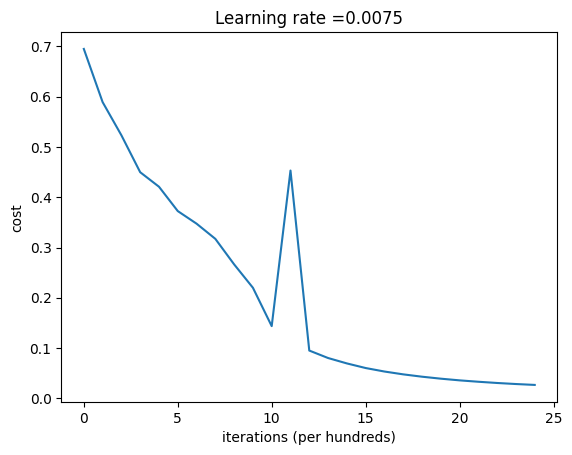

In [32]:
learning_rate = 0.0075
layers_dims = [12288, 7, 1]

parameters_2layers, losses_2layers = optimize(train_set_x, train_set_y, layers_dims=layers_dims, learning_rate=learning_rate, num_iterations = 2500, print_cost = True)

# plot the cost
plt.plot(np.squeeze(losses_2layers))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

**Expected result:**       
<table>
    <tr>
        <td> **Custo após iteração 0**</td>
        <td> 0.695046 </td>
    </tr>
    <tr>
        <td> **Custo após iteração 100**</td>
        <td> 0.589260 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Custo após iteração 2400**</td>
        <td> 0.026615 </td>
    </tr>
</table>

Now use the same `optimize` function to train a 4-layer MLP and plot its learning curve.

Loss after iteration 0: 0.771749
Loss after iteration 100: 0.672053
Loss after iteration 200: 0.648263
Loss after iteration 300: 0.611507
Loss after iteration 400: 0.567047
Loss after iteration 500: 0.540138
Loss after iteration 600: 0.527930
Loss after iteration 700: 0.465477
Loss after iteration 800: 0.369126
Loss after iteration 900: 0.391747
Loss after iteration 1000: 0.315187
Loss after iteration 1100: 0.272700
Loss after iteration 1200: 0.237419
Loss after iteration 1300: 0.199601
Loss after iteration 1400: 0.189263
Loss after iteration 1500: 0.161189
Loss after iteration 1600: 0.148214
Loss after iteration 1700: 0.137775
Loss after iteration 1800: 0.129740
Loss after iteration 1900: 0.121225
Loss after iteration 2000: 0.113821
Loss after iteration 2100: 0.107839
Loss after iteration 2200: 0.102855
Loss after iteration 2300: 0.100897
Loss after iteration 2400: 0.092878


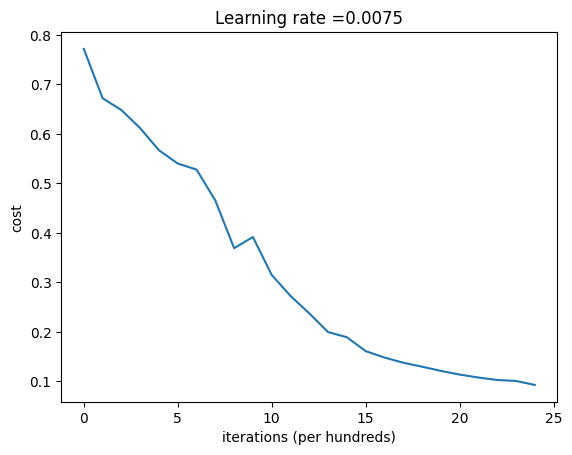

In [33]:
#  modelo com 4-camadas
learning_rate = 0.0075
layers_dims = [12288, 20, 7, 5, 1]

parameters_4layers, losses_4layers = optimize(train_set_x, train_set_y, layers_dims, learning_rate, num_iterations = 2500, print_cost = True)

# plot the cost
plt.plot(np.squeeze(losses_4layers))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

**Expected result:**       
<table>
    <tr>
        <td> **Cost after iteration 0**</td>
        <td> 0.771749 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 100**</td>
        <td> 0.672053 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Cost after iteration 2400**</td>
        <td> 0.092878 </td>
    </tr>
</table>

### **Part 7: Evaluate trained models**

Finally, apply the threshold $\hat{y} =
\begin{cases}
1,\ \text{if}\ h(x) \geq 0.5\\
0,\  \text{if}\ h(x) < 0.5\\
\end{cases}$ to classify all examples in a matrix X of examples.

In [34]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model

    Returns:
    p -- predictions for the given dataset X
    accuracy -- percentage of examples correcly labelled
    """

    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))

    # Forward propagation

    Y_hat, caches = forward_pass(X, parameters)


    # Convert probs to 0/1 predictions

    for i in range(0, Y_hat.shape[1]):
      if Y_hat[0, i] > 0.5:
        p[0, i] = 1
      else:
        p[0, i] = 0


    # Compute accuracy

    accuracy = np.mean(p == y)


    return accuracy

In [35]:
accuracy_train_2layers = predict(train_set_x, train_set_y, parameters_2layers)
accuracy_test_2layers = predict(test_set_x, test_set_y, parameters_2layers)

accuracy_train_4layers = predict(train_set_x, train_set_y, parameters_4layers)
accuracy_test_4layers = predict(test_set_x, test_set_y, parameters_4layers)

print("2 Layer Train Accuracy:", accuracy_train_2layers)
print("2 Layer Test Accuracy:", accuracy_test_2layers)
print("4 Layer Train Accuracy:", accuracy_train_4layers)
print("4 Layer Test Accuracy:", accuracy_test_4layers)

2 Layer Train Accuracy: 1.0
2 Layer Test Accuracy: 0.74
4 Layer Train Accuracy: 0.9856459330143541
4 Layer Test Accuracy: 0.8


**Expected result:**       
<table>
    <tr>
    <td>
    **2 Layer Train Accuracy**
    </td>
    <td>
    0.9999999999999998
    </td>
    </tr>
    <tr>
    <td> **2 Layer Test Accuracy**</td>
    <td> 0.74 </td>
    </tr>
        <tr>
    <td> **4 Layer Train Accuracy**</td>
    <td> 0.9856459330143539 </td>
    </tr>
        <tr>
    <td> **4 Layer Test Accuracy**</td>
    <td> 0.8 </td>
    </tr>
</table>

Congratulations! Your 4-layer MLP performed better (80%) than your 2-layer MLP (72%) when evaluated with your test data. This is a good performance!

### **Part 8: Test with your own images**

To test your model with your own images, you'll need to upload the images you want to test to your UFV Google Drive. Then configure the `image_path` variable in the cell below to point to the path of the image in your Google Drive. Note that the path to the root directory of your Google Drive is "/content/gdrive/MyDrive/". Therefore, if your image is in the root of your Google Drive and is called "my_cat.jpg", the variable should be configured as `image_path = /content/gdrive/MyDrive/my_cat.jpg`

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
y = 1, your algorithm predicts a "cat" picture.


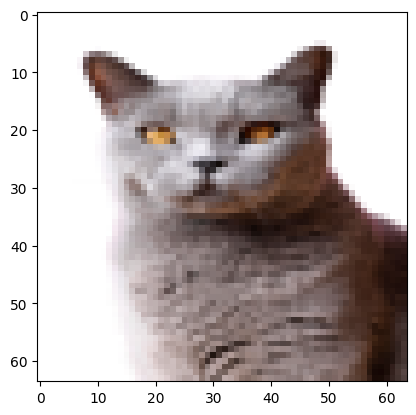

In [38]:
from google.colab import drive
drive.mount('/content/gdrive')


image_path ="/content/gdrive/MyDrive/ImagensTeste/8623479.jpg"


# We preprocess the image to fit your algorithm.
with Image.open(image_path) as im:
  low_res_image = np.array(im.resize((num_px, num_px)))



x = low_res_image.reshape((num_px * num_px * 3, 1))
x = x / 255

plt.imshow(low_res_image)
probability, _ = forward_pass(x, parameters_2layers)
prediction = (probability > 0.5).astype(int)
pred_value = np.squeeze(prediction)
class_name = classes[int(pred_value),].decode("utf-8")

print("y = " + str(pred_value) + ", your algorithm predicts a \"" + class_name +  "\" picture.")